<a href="https://colab.research.google.com/github/sobanaramakrishnan/infosys/blob/main/interview_dataset_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

creation of dummy dataset


In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import random
from faker import Faker

fake = Faker()

roles = {
    'Data Scientist': ['Python', 'Statistics', 'Machine Learning', 'Deep Learning', 'NLP'],
    'Data Engineer': ['MLOps', 'Airflow', 'Big Data', 'ETL', 'Hadoop'],
    'Software Engineer': ['Java', 'C++', 'Python', 'Algorithms', 'System Design'],
    'Product Manager': ['Market Research', 'Project Management', 'Roadmapping', 'Business Acumen', 'Customer Feedback'],
    'UI Engineer': ['HTML', 'CSS', 'JavaScript', 'React', 'UI/UX Design']
}

# Generate candidate profile
def generate_candidate():
    name = fake.name()
    role = random.choice(list(roles.keys()))
    skillset = roles[role]
    profile = {
        'Name': name,
        'Role': role,
        'Skills': skillset
    }
    return profile

# Enhanced interview simulation with conversation
def simulate_interview_with_conversation(profile):
    role = profile['Role']
    skillset = roles[role]
    interviewer_questions = [
        f"Can you explain the importance of {skill} in your role?" for skill in skillset
    ]
    candidate_responses = [
        "I am well-versed in this topic and have applied it in previous projects.",
        "I have a basic understanding of this concept but would like to improve further.",
        "I am not very familiar with this topic."
    ]

    # Simulate a conversation
    conversation = []
    for _ in range(3):  # Assume 3 questions in the interview
        question = random.choice(interviewer_questions)
        response = random.choice(candidate_responses)
        conversation.append(f"Interviewer: {question}\nInterviewee: {response}")

    outcome = random.choice(["Select", "Reject"])
    reason = random.choice(["Poor technical knowledge", "Lack of business acumen", "Insufficient experience"]) if outcome == "Reject" else "N/A"

    transcript = "\n".join(conversation)

    return transcript, outcome, reason

def generate_resume(profile, transcript, outcome, reason):
    resume = f"Name: {profile['Name']}\n"
    resume += f"Role: {profile['Role']}\n"
    resume += f"Skills: {', '.join(profile['Skills'])}\n"
    resume += f"Interview Performance: {'Rejected' if outcome == 'Reject' else 'Selected'}\n"
    resume += f"Reason for Decision: {reason}\n"
    resume += f"Transcript:\n{transcript}\n"
    return resume

def generate_job_description(role):
    descriptions = {
        'Data Scientist': "Analyze and interpret complex data to provide insights.",
        'Data Engineer': "Build and optimize data pipelines and architecture.",
        'Software Engineer': "Develop, test, and maintain software applications.",
        'Product Manager': "Define product vision and prioritize features for development.",
        'UI Engineer': "Design and implement user interfaces with a focus on user experience."
    }
    return descriptions[role]


data = []

for i in range(1, 501):
    profile = generate_candidate()
    transcript, outcome, reason = simulate_interview_with_conversation(profile)
    resume = generate_resume(profile, transcript, outcome, reason)
    job_description = generate_job_description(profile['Role'])
    data.append({
        'ID': i,
        'Name': profile['Name'],
        'Role': profile['Role'],
        'Transcript': transcript,
        'Resume': resume,
        'Performance': outcome,
        'Reason for Decision': reason,
        'Job Description': job_description
    })


df = pd.DataFrame(data)
df.to_csv('candidate_interview_data.csv', index=False)
print("Data saved as 'candidate_interview_data.csv'.")


Data saved as 'candidate_interview_data.csv'.


feature extraction, exploratory data analysis


IMPORTING NECESSARY LIBRARIES

In [ ]:
!pip install wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

LOAD DATA AND OVERVIEW OF DATA

In [ ]:
data = pd.read_csv("/content/dataset1.csv")
print(data.info())
print(data.describe(include='all'))
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   500 non-null    object 
 1   Name                 500 non-null    object 
 2   Role                 500 non-null    object 
 3   Transcript           500 non-null    object 
 4   Resume               500 non-null    object 
 5   decision             500 non-null    object 
 6   Reason for decision  500 non-null    object 
 7   Job Description      500 non-null    object 
 8   Unnamed: 8           0 non-null      float64
 9   Unnamed: 9           0 non-null      float64
 10  Unnamed: 10          0 non-null      float64
 11  Unnamed: 11          0 non-null      float64
 12  Unnamed: 12          0 non-null      float64
 13  Unnamed: 13          0 non-null      float64
 14  Unnamed: 14          0 non-null      float64
 15  Unnamed: 15          0 non-null      flo

HANDLING MISSING VALUES


In [ ]:
data.fillna("Missing", inplace=True)

FEATURE ENGINERRING-TEXT LENGTH AND COUNT

In [ ]:
data['Transcript_Length'] = data['Transcript'].apply(len)
data['Resume_Length'] = data['Resume'].apply(len)
data['Transcript_Word_Count'] = data['Transcript'].apply(lambda x: len(x.split()))
data['Resume_Word_Count'] = data['Resume'].apply(lambda x: len(x.split()))

TFIDF VECTORIZATION

In [ ]:
tfidf = TfidfVectorizer(max_features=100)
transcript_tfidf = tfidf.fit_transform(data['Transcript'])
resume_tfidf = tfidf.fit_transform(data['Resume'])

DISTRIBUTION OF DECISION

<ipython-input-19-12d545d14321>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='decision', data=data, palette='viridis')


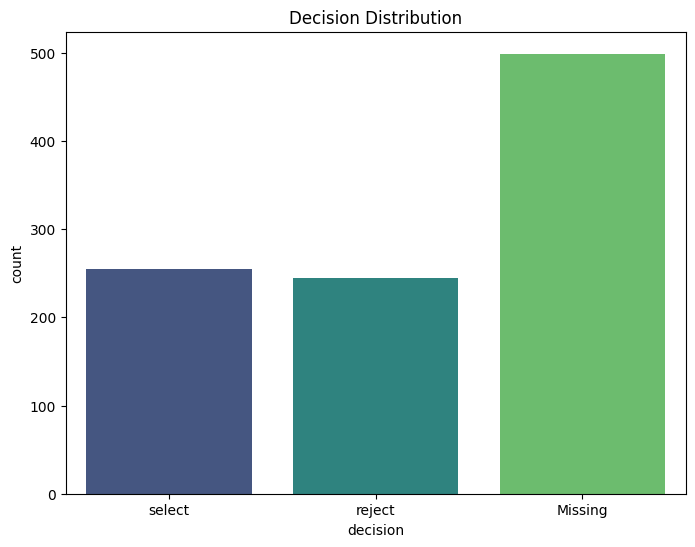

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='decision', data=data, palette='viridis')
plt.title('Decision Distribution')
plt.show()

COMMON WORD IN TRANSCRIPT

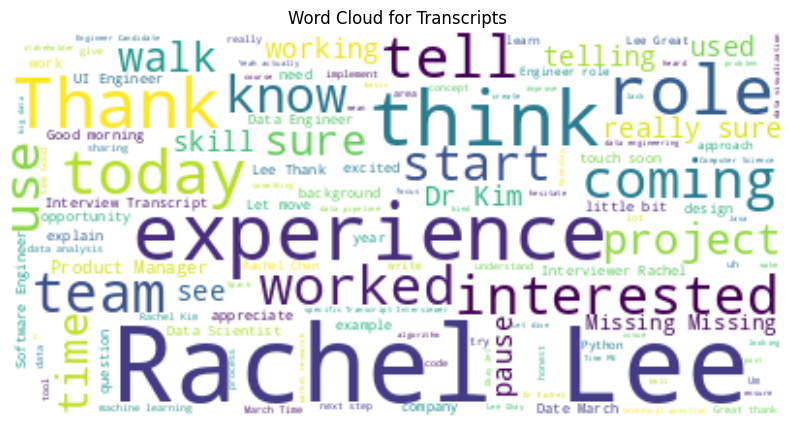

In [ ]:
transcript_text = ' '.join(data['Transcript'])
wordcloud_transcript = WordCloud(background_color='white').generate(transcript_text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_transcript, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Transcripts')
plt.show()

INSIGHTS FROM RESUME

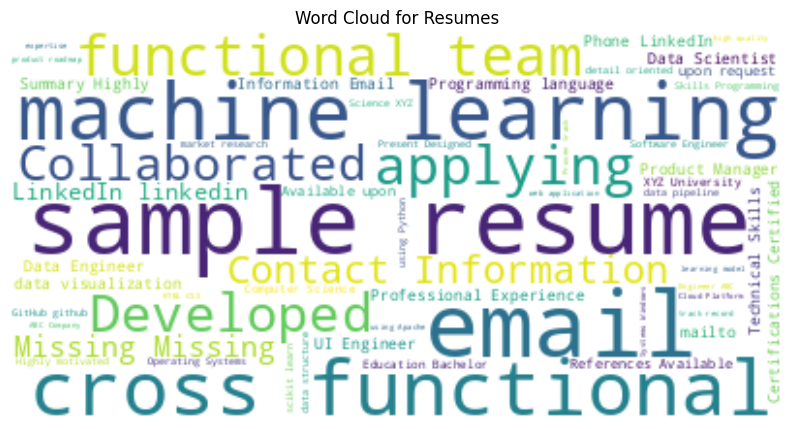

In [ ]:
resume_text = ' '.join(data['Resume'])
wordcloud_resume = WordCloud(background_color='white').generate(resume_text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_resume, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Resumes')
plt.show()

DECISION AND READON ANALYSIS

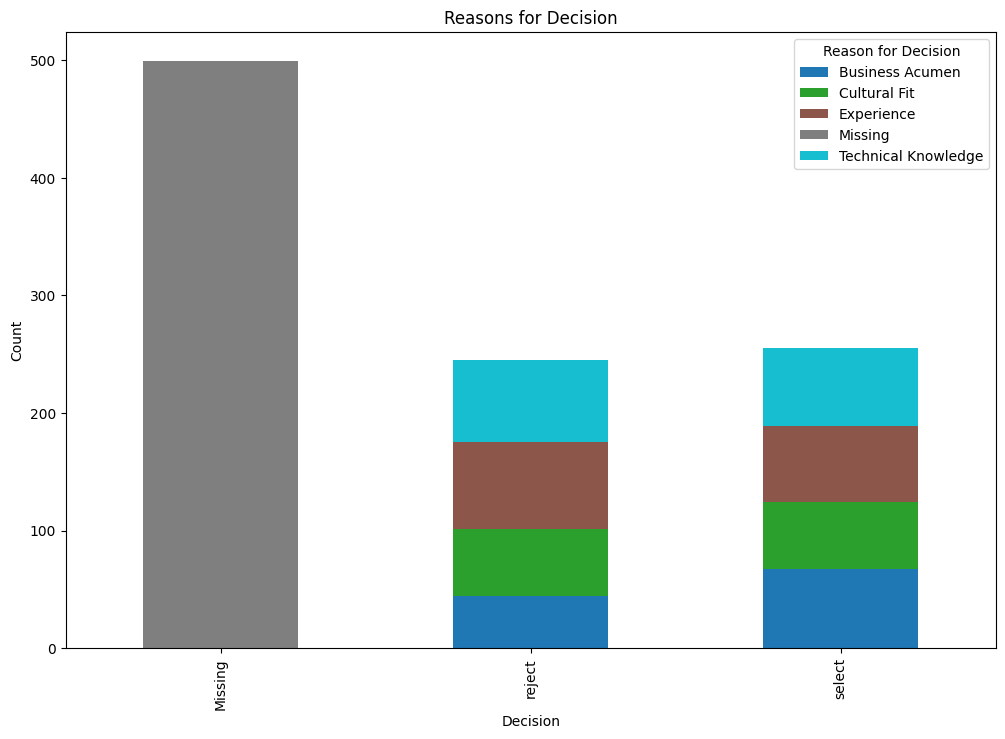

In [ ]:
decision_reason = data.groupby('decision')['Reason for decision'].value_counts().unstack().fillna(0)
decision_reason.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab10')
plt.title('Reasons for Decision')
plt.ylabel('Count')
plt.xlabel('Decision')
plt.legend(title='Reason for Decision')
plt.show()

JOB DESCRIPTION ANALYSIS

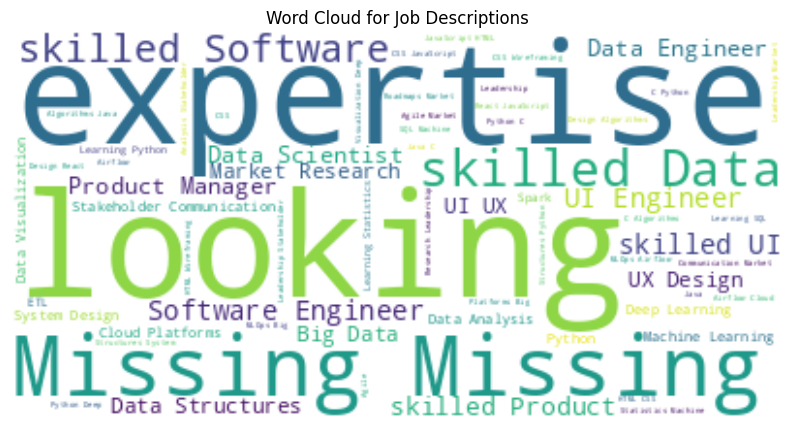

In [ ]:
job_description_text = ' '.join(data['Job Description'])
wordcloud_job_description = WordCloud(background_color='white').generate(job_description_text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_job_description, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job Descriptions')
plt.show()

INSIGHT FROM NUMERICAL FEATURES

<ipython-input-27-4d2c062d6a0c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='decision', y='Transcript_Length', data=data, palette='coolwarm')


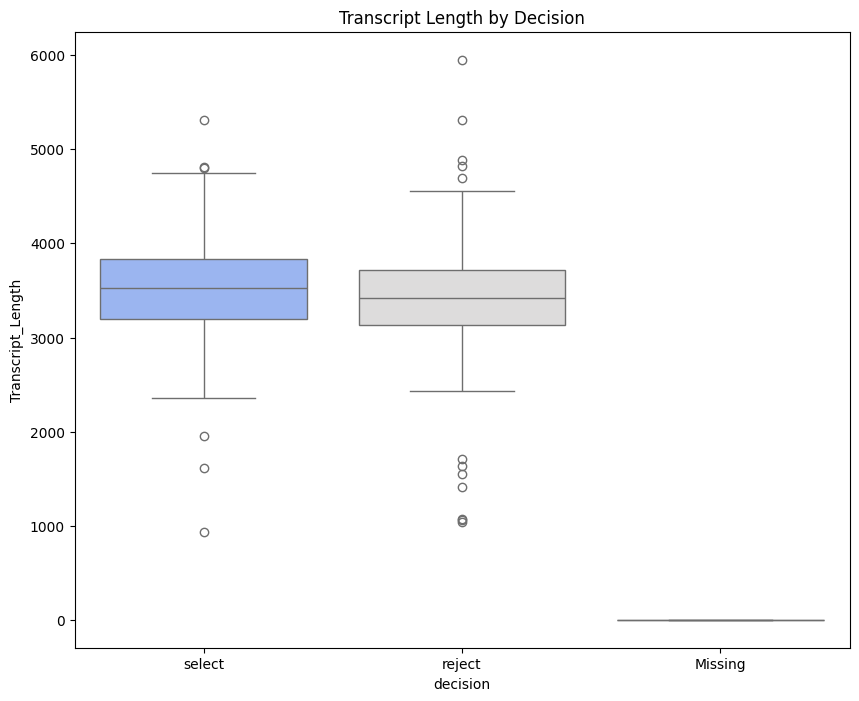

<ipython-input-27-4d2c062d6a0c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='decision', y='Resume_Length', data=data, palette='coolwarm')


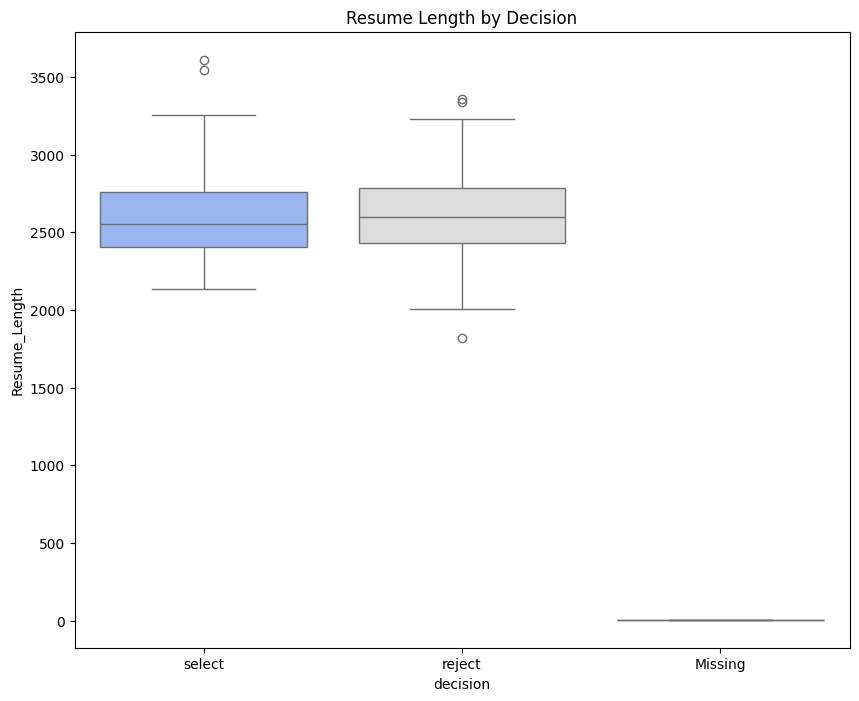

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='decision', y='Transcript_Length', data=data, palette='coolwarm')
plt.title('Transcript Length by Decision')
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x='decision', y='Resume_Length', data=data, palette='coolwarm')
plt.title('Resume Length by Decision')
plt.show()

ROLE VS DECISION HEATMAP

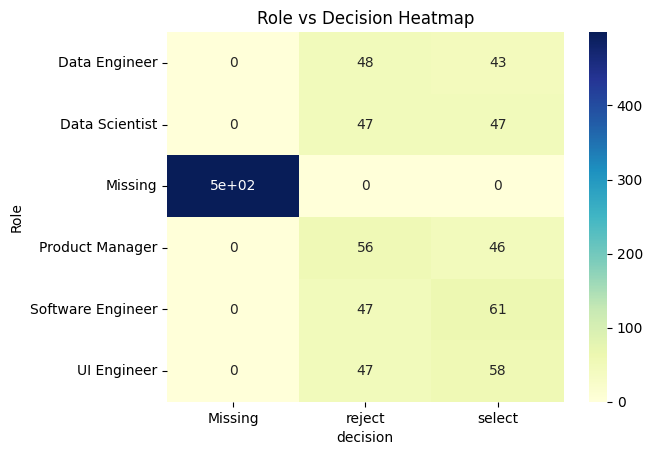

In [ ]:
role_decision_pivot = pd.crosstab(data['Role'], data['decision'])
sns.heatmap(role_decision_pivot, annot=True, cmap='YlGnBu')
plt.title('Role vs Decision Heatmap')
plt.show()


STATISTICAL SUMMARY

In [ ]:
text_columns = ['Transcript', 'Resume', 'Job Description']
data['Transcript_Length'] = data['Transcript'].apply(len)
data['Resume_Length'] = data['Resume'].apply(len)
data['Job_Description_Length'] = data['Job Description'].apply(len)

data['Transcript_Word_Count'] = data['Transcript'].apply(lambda x: len(x.split()))
data['Resume_Word_Count'] = data['Resume'].apply(lambda x: len(x.split()))
data['Job_Description_Word_Count'] = data['Job Description'].apply(lambda x: len(x.split()))


LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
data['ROLE_Encoded'] = label_enc.fit_transform(data['Role'])
data['DECISION_Encoded'] = label_enc.fit_transform(data['decision'])


CORRELATION ANALYSIS

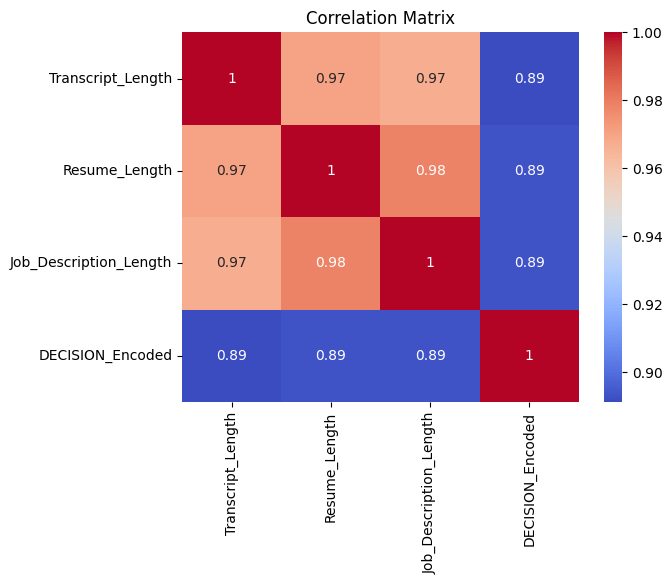

In [ ]:
numeric_features = ['Transcript_Length', 'Resume_Length', 'Job_Description_Length']
correlation_matrix = data[numeric_features + ['DECISION_Encoded']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


CLUSTERING ANALYSIS(K-MEANS)

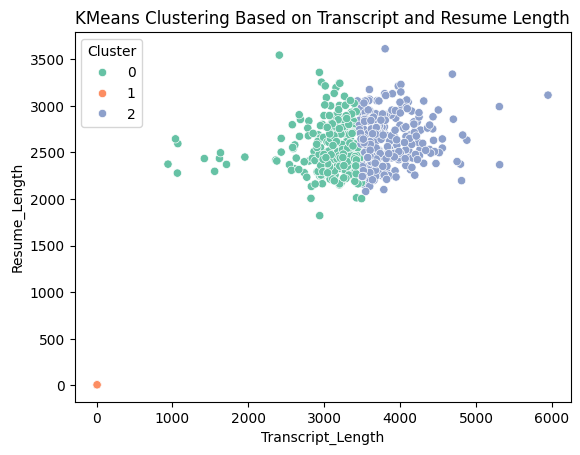

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Transcript_Length', 'Resume_Length', 'Job_Description_Length']])
sns.scatterplot(x='Transcript_Length', y='Resume_Length', hue='Cluster', data=data, palette='Set2')
plt.title('KMeans Clustering Based on Transcript and Resume Length')
plt.show()


CHI-SQUARE TEST FOR CATEGORICAL DEPENDENCY

In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['decision'], data['Role'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")
if p < 0.05:
    print("Significant dependency between Decision and Role.")
else:
    print("No significant dependency between Decision and Role.")


Chi-Square Test Results:
Chi2 Statistic: 1007.039797690246
P-Value: 5.6937530302006465e-210
Significant dependency between Decision and Role.


BOXPLOT FOR TEXT LENGTH BY DECISION

<ipython-input-41-b9fde776d13e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='decision', y='Transcript_Length', data=data, palette='husl')


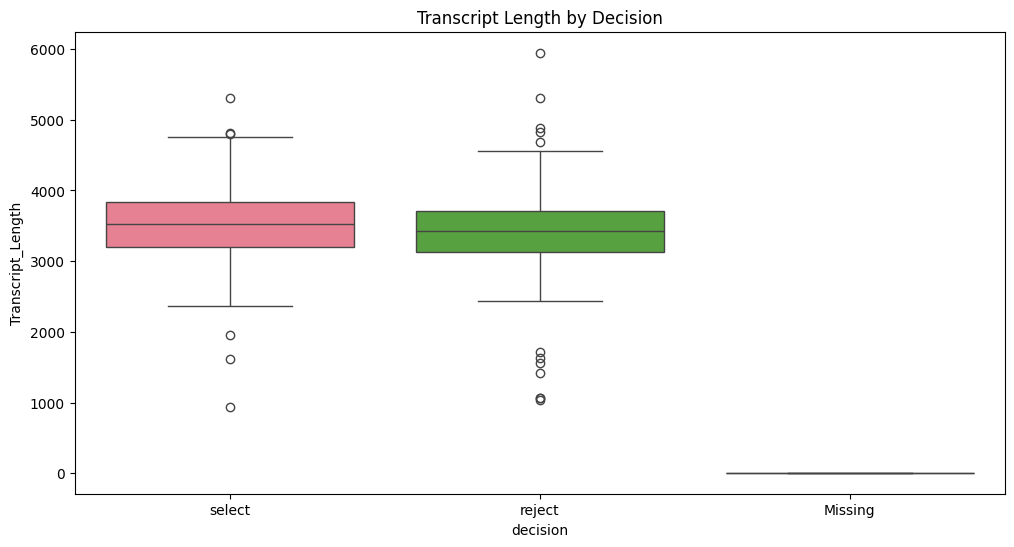

<ipython-input-41-b9fde776d13e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='decision', y='Resume_Length', data=data, palette='husl')


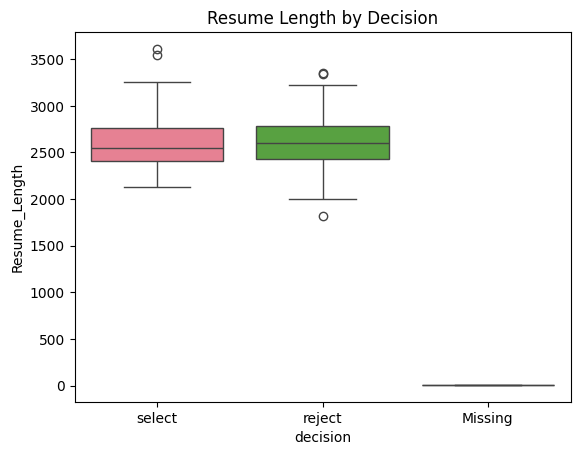

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='decision', y='Transcript_Length', data=data, palette='husl')
plt.title('Transcript Length by Decision')
plt.show()

sns.boxplot(x='decision', y='Resume_Length', data=data, palette='husl')
plt.title('Resume Length by Decision')
plt.show()
